# Classifying CIFAR10 Dataset Using KNN Algorithm

## Installing opencv

In [1]:
pip install opencv_contrib_python

Note: you may need to restart the kernel to use updated packages.


## Installing tqdm

In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import math 

## Loading Train Data

In [4]:
DATA_DIR= r'C:CIFAR-10-images\train'
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

train_data=[]

for c in CATEGORIES:
    path=os.path.join(DATA_DIR,c)
    class_num=CATEGORIES.index(c) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            train_data.append([img_array,class_num]) 
        except Exception as e:  
            pass
            
print(len(train_data))

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7833.41it/s]

5000


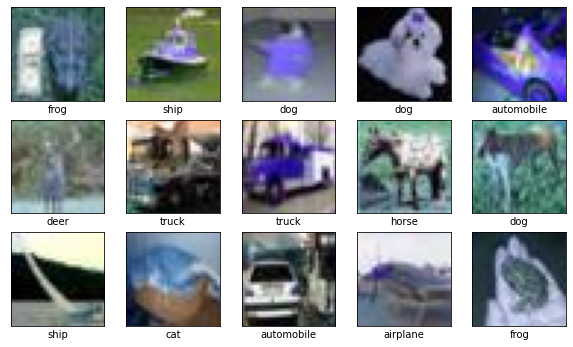

In [5]:
import random
random.shuffle(train_data)

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0])
    plt.xlabel(CATEGORIES[train_data[i][1]])
plt.show()

## Loading Test Data

In [6]:
DATA_DIR= r'C:CIFAR-10-images\train'
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

test_data=[]

for c in CATEGORIES:
    path=os.path.join(DATA_DIR,c)
    class_num=CATEGORIES.index(c) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            
            test_data.append([img_array,class_num]) 
        except Exception as e:  
            pass
            
print(len(test_data))

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7596.29it/s]

5000


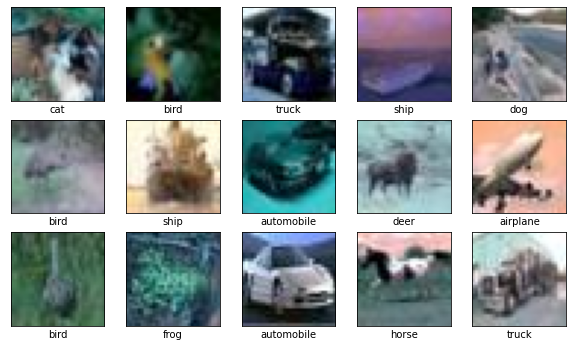

In [7]:
import random
random.shuffle(test_data)

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i][0])
    plt.xlabel(CATEGORIES[test_data[i][1]])
plt.show()

## KNN Manhattan Distance Calculation

In [8]:
def l1_distance(test,k):    
    x=[]

    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                print(CATEGORIES[train_data[i][1]])
                break

## Predicting a Single Test Image

In [9]:
def l1_distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))): #for i in tqdm(range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                #print(CATEGORIES[train_data[i][1]])
                prediction_array.append(train_data[i][1])
                break

    #print(prediction_array)
    
    check = []
    for i in range(0, len(CATEGORIES)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(CATEGORIES)):
        if check[final_prediction] == max(check):
            #print('Prediction : ' +CATEGORIES[final_prediction])
            return final_prediction

In [10]:
Single_Prediction = l1_distance_accuracy(test_data[436][0],5)    #K =5
print('Prediction : ' + CATEGORIES[Single_Prediction])
print('Correct :' + CATEGORIES[test_data[436][1]])

Prediction : airplane
Correct :airplane


Text(0.5, 0, 'airplane')

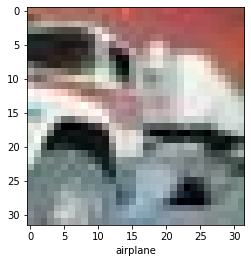

In [11]:
plt.imshow(test_data[1036][0],cmap=plt.cm.gray)
plt.xlabel(CATEGORIES[test_data[436][1]])

## Accuracy For Different K Values (K = 12)

In [12]:
def single_accuracy(k, test_data_number):
    print('Calculating...   (k = '+str(k)+')')
    accuracy_count = 0
    for j in tqdm(range(0, test_data_number)):
        #print('------------')
        if l1_distance_accuracy(test_data[j][0], k) == test_data[j][1]:
            accuracy_count = accuracy_count + 1

    accuracy = (accuracy_count*100)/(j+1)
    
    print('-------------------------------------------------------')
    print('\t\tAccuracy When k = '+ str(k) +' is '+ str(accuracy))
    print('-------------------------------------------------------')
    
    return accuracy

In [14]:
k = 12

accuracy_array = []

for i in range(0, k):  
    accuracy_array.append(single_accuracy(i+1, len(test_data)))

Calculating...   (k = 1)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [16:26<00:00,  5.07it/s]


-------------------------------------------------------
		Accuracy When k = 1 is 100.0
-------------------------------------------------------
Calculating...   (k = 2)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [20:04<00:00,  4.15it/s]


-------------------------------------------------------
		Accuracy When k = 2 is 47.06
-------------------------------------------------------
Calculating...   (k = 3)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [26:15<00:00,  3.17it/s]


-------------------------------------------------------
		Accuracy When k = 3 is 40.18
-------------------------------------------------------
Calculating...   (k = 4)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [22:16<00:00,  3.74it/s]


-------------------------------------------------------
		Accuracy When k = 4 is 36.92
-------------------------------------------------------
Calculating...   (k = 5)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [24:35<00:00,  3.39it/s]


-------------------------------------------------------
		Accuracy When k = 5 is 34.8
-------------------------------------------------------
Calculating...   (k = 6)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [37:21<00:00,  2.23it/s]


-------------------------------------------------------
		Accuracy When k = 6 is 32.66
-------------------------------------------------------
Calculating...   (k = 7)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [46:29<00:00,  1.79it/s]


-------------------------------------------------------
		Accuracy When k = 7 is 31.06
-------------------------------------------------------
Calculating...   (k = 8)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [47:40<00:00,  1.75it/s]


-------------------------------------------------------
		Accuracy When k = 8 is 29.9
-------------------------------------------------------
Calculating...   (k = 9)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [39:49<00:00,  2.09it/s]


-------------------------------------------------------
		Accuracy When k = 9 is 29.34
-------------------------------------------------------
Calculating...   (k = 10)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [39:03<00:00,  2.13it/s]


-------------------------------------------------------
		Accuracy When k = 10 is 28.5
-------------------------------------------------------
Calculating...   (k = 11)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [41:41<00:00,  2.00it/s]


-------------------------------------------------------
		Accuracy When k = 11 is 27.22
-------------------------------------------------------
Calculating...   (k = 12)


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [56:24<00:00,  1.48it/s]

-------------------------------------------------------
		Accuracy When k = 12 is 27.1
-------------------------------------------------------


In [16]:
print(accuracy_array)

[100.0, 47.06, 40.18, 36.92, 34.8, 32.66, 31.06, 29.9, 29.34, 28.5, 27.22, 27.1]


In [17]:
k_array = list(range(1, k+1))
print(k_array)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


## Plotting Accuracy (%) VS K Graph

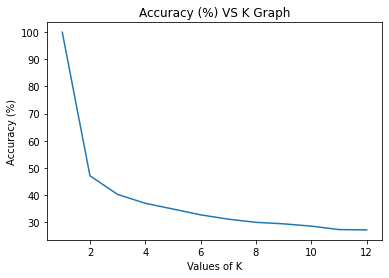

In [18]:
plt.xlabel('Values of K')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy (%) VS K Graph')
plt.plot(k_array, accuracy_array)